# Librerias y dependecias

In [60]:
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ytmusicapi import YTMusic
from tqdm import tqdm
import re
import time
import random
import requests
import os
from dotenv import load_dotenv

# Carga del Dataset

In [61]:
df_final_filtrado = pd.read_csv("../data/processed/04_dataset_filtrado.csv", encoding="utf-8")

## Análisis exploratorio (EDA)

In [62]:
df_final_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artista           743 non-null    object 
 1   tema              743 non-null    object 
 2   genero            743 non-null    object 
 3   popularidad       743 non-null    float64
 4   fuente            743 non-null    object 
 5   spotify_id        743 non-null    object 
 6   año               617 non-null    float64
 7   id                743 non-null    object 
 8   href              743 non-null    object 
 9   acousticness      743 non-null    float64
 10  danceability      743 non-null    float64
 11  energy            743 non-null    float64
 12  instrumentalness  743 non-null    float64
 13  key               743 non-null    float64
 14  liveness          743 non-null    float64
 15  loudness          743 non-null    float64
 16  mode              743 non-null    float64
 1

### Conversion: tipo de datos

In [63]:
# Convertir columnas a números enteros
columnas_a_convertir = ['popularidad', 'año', 'key', 'mode']

for columna in columnas_a_convertir:
    if columna in df_final_filtrado.columns:
        # Primero rellenamos los NaN con 0 (o puedes usar otro valor)
        df_final_filtrado[columna] = df_final_filtrado[columna].fillna(0).astype('int64')

# Verificar los cambios
df_final_filtrado[columnas_a_convertir].info()
print("\nPrimeras filas después de la conversión:")
print(df_final_filtrado[columnas_a_convertir].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   popularidad  743 non-null    int64
 1   año          743 non-null    int64
 2   key          743 non-null    int64
 3   mode         743 non-null    int64
dtypes: int64(4)
memory usage: 23.3 KB

Primeras filas después de la conversión:
   popularidad   año  key  mode
0           15  2024    2     1
1           27  2024    0     1
2           10  2024    7     1
3           15  2025   11     0
4           14  2024    0     1


### Estadísticas descriptivas (df.describe()).

In [64]:
df_final_filtrado.describe().T

,count,mean,std,min,25%,50%,75%,max
popularidad,743.0,54.153432,25.290509,0.000000,31.50000,65.00000,73.00000,100.000
año,743.0,1681.246299,760.267739,0.000000,2024.00000,2024.00000,2025.00000,2025.000
acousticness,743.0,0.178168,0.244864,0.000002,0.00688,0.06930,0.23400,0.996
danceability,743.0,0.637983,0.167298,0.132000,0.52200,0.66100,0.76800,0.951
energy,743.0,0.706255,0.201331,0.003320,0.60000,0.74800,0.85700,0.991
instrumentalness,743.0,0.112064,0.261267,0.000000,0.00000,0.00001,0.00747,0.995
key,743.0,5.187079,3.700549,0.000000,1.00000,5.00000,8.00000,11.000
liveness,743.0,0.180546,0.145768,0.025400,0.09680,0.12300,0.22350,0.982
loudness,743.0,-6.544131,4.462563,-46.113000,-7.15550,-5.40800,-4.39400,-0.430
mode,743.0,0.580081,0.493878,0.000000,0.00000,1.00000,1.00000,1.000


### Visualización de distribución de variables (histogramas, boxplots).

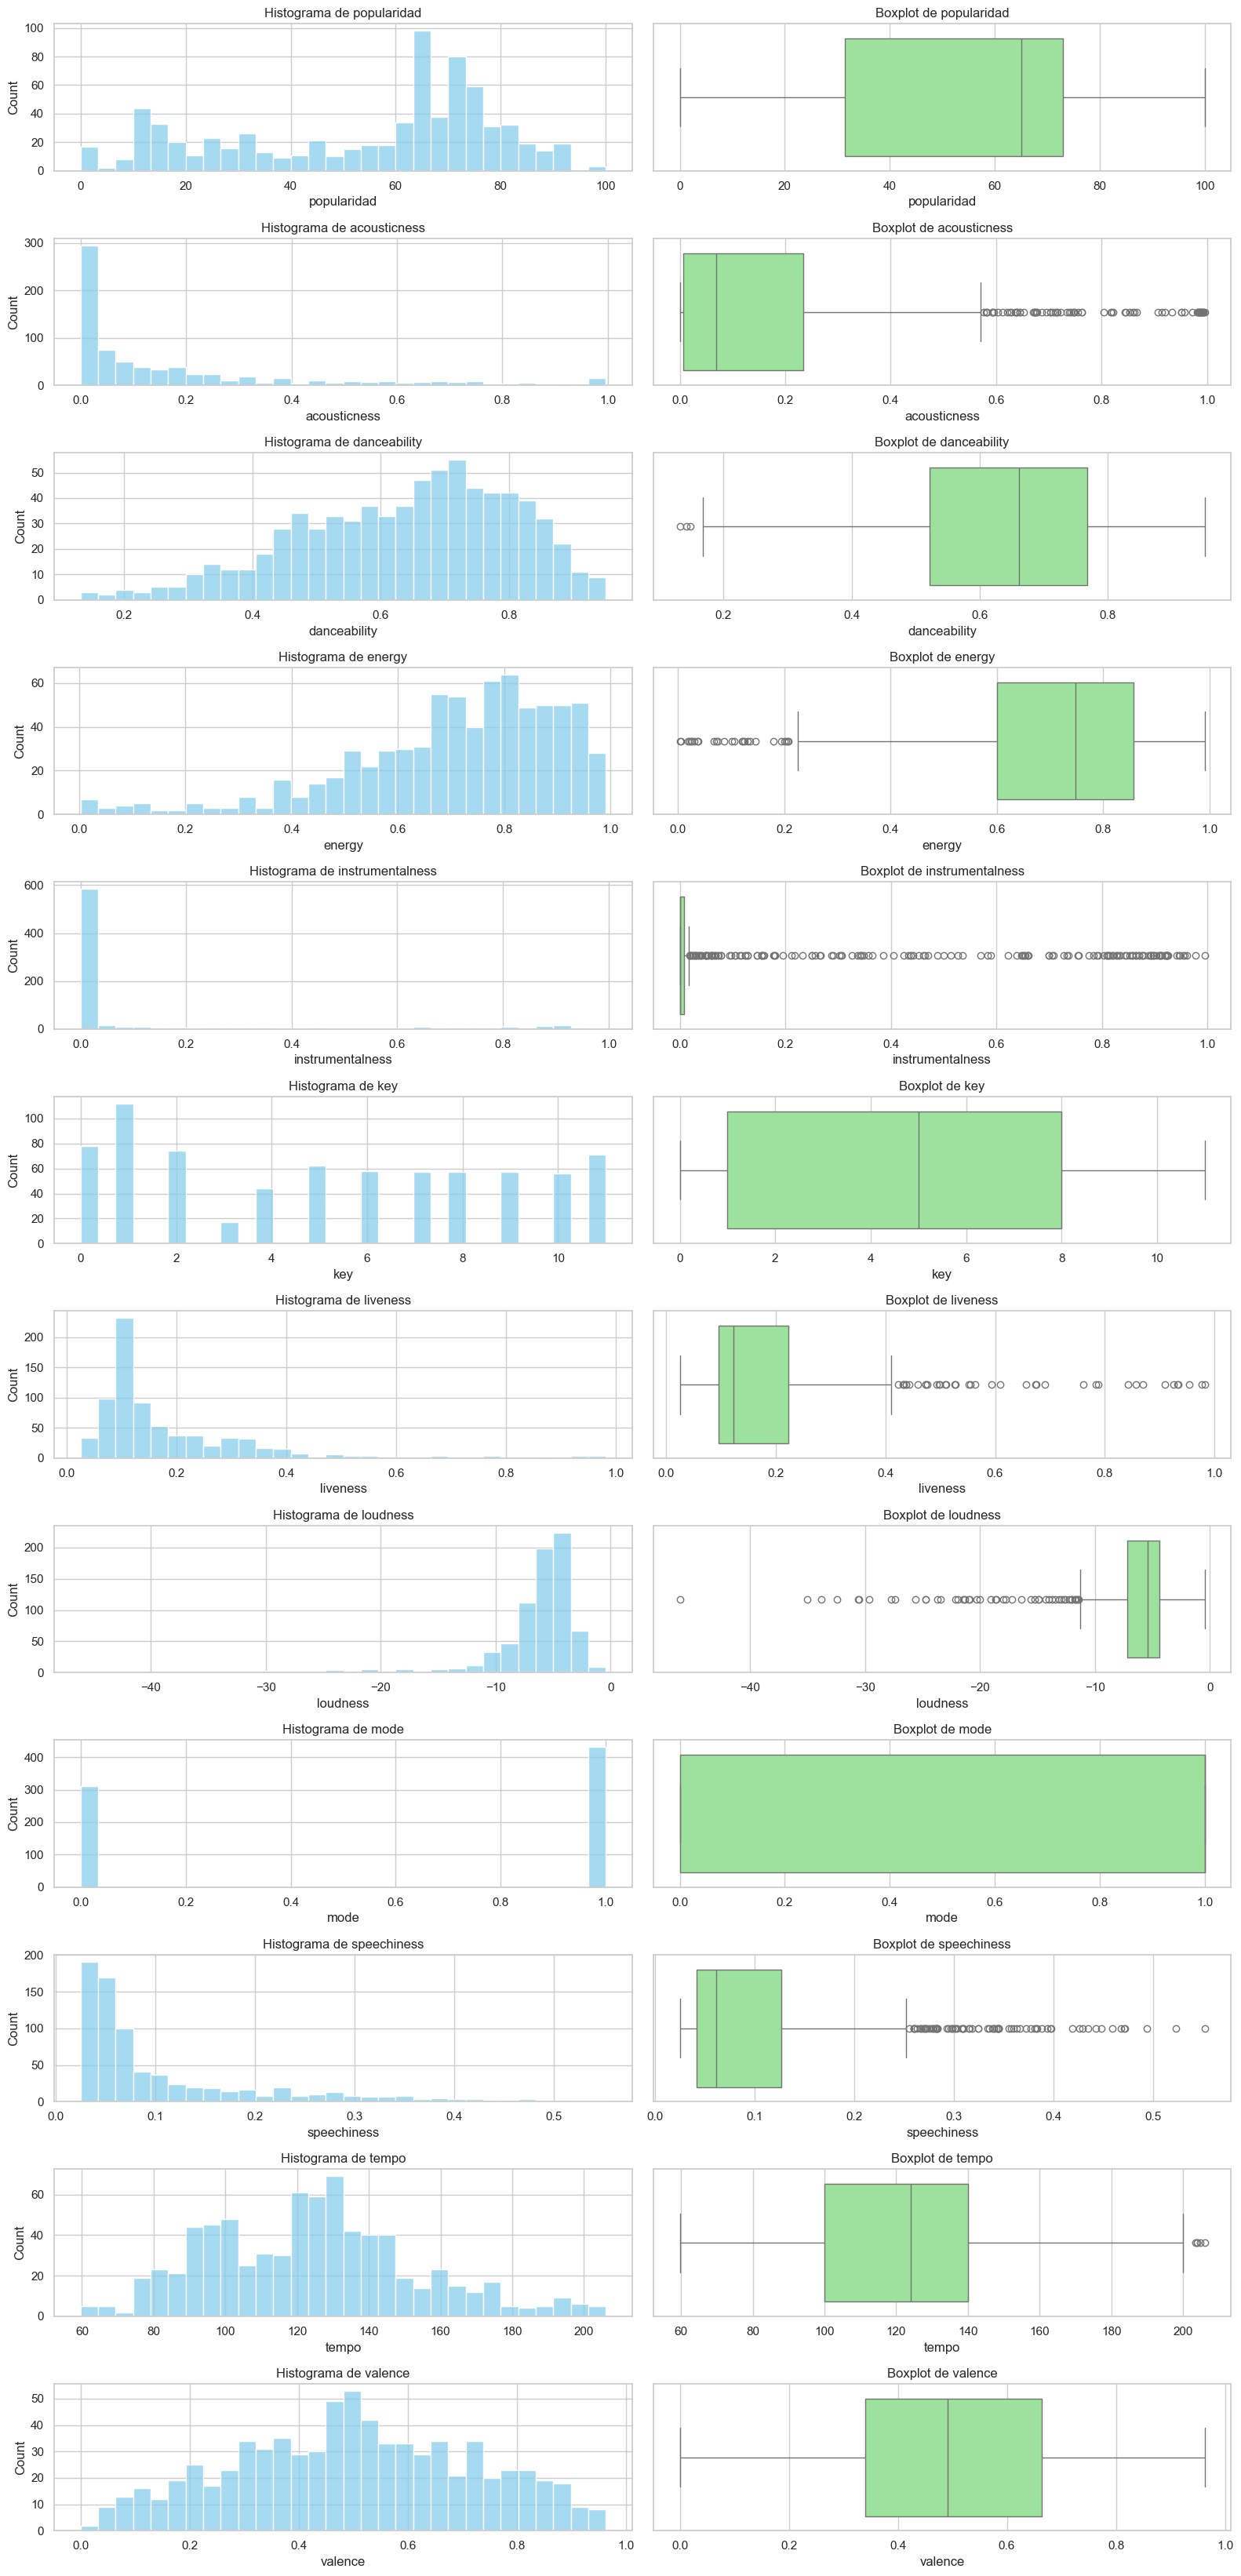

In [65]:
# Reiniciar lienzo / cerrar figuras previas
#plt.close('all')

features_audio = ['popularidad','acousticness','danceability','energy','instrumentalness',
                  'key','liveness','loudness','mode','speechiness','tempo','valence']

sns.set(style="whitegrid")
plt.figure(figsize=(16, 33))

for i, feature in enumerate(features_audio):
    plt.subplot(len(features_audio), 2, i*2+1)
    sns.histplot(df_final_filtrado[feature], bins=30, kde=False, color='skyblue')
    plt.title(f'Histograma de {feature}')

    plt.subplot(len(features_audio), 2, i*2+2)
    sns.boxplot(x=df_final_filtrado[feature], color='lightgreen')
    plt.title(f'Boxplot de {feature}')

plt.tight_layout()
plt.savefig('../reports/figures/04-Histogramas-y-boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


### distribución de canciones por género

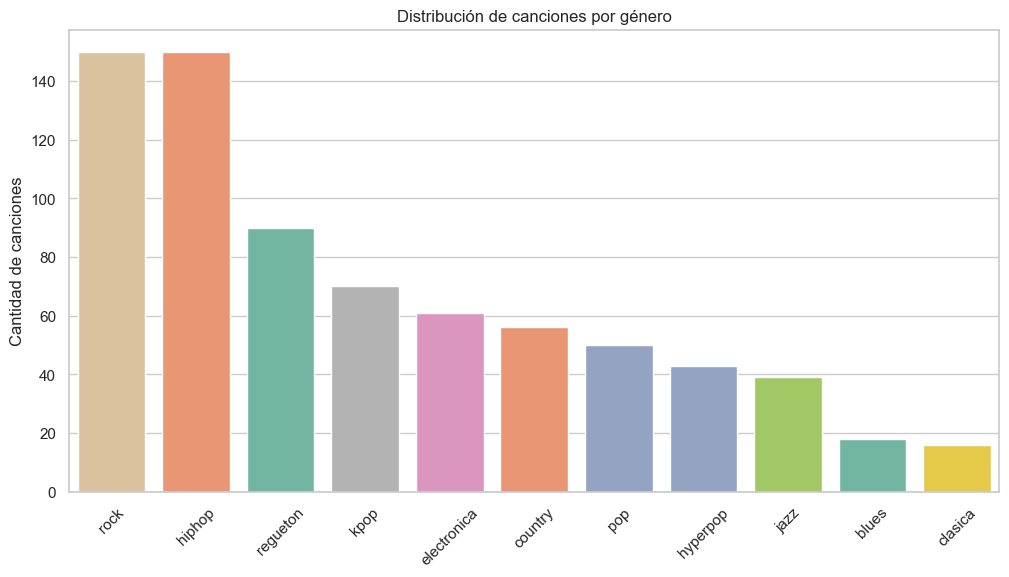

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_final_filtrado,
    x='genero',
    hue='genero',        # asignamos hue igual a x
    dodge=False,                # para que las barras se apilen (no separadas)
    order=df_final_filtrado['genero'].value_counts().index,
    palette='Set2'
)
plt.xticks(rotation=45)  # gira etiquetas si hay muchos géneros
plt.title('Distribución de canciones por género')
plt.ylabel('Cantidad de canciones')
plt.xlabel('')
plt.savefig('../reports/figures/04-distribucion-canciones-por-genero.png', dpi=300, bbox_inches='tight')
plt.show()


### Visualizaciones de correlación

                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.138787 -0.698675          0.337281   
danceability         -0.138787      1.000000  0.005642         -0.221921   
energy               -0.698675      0.005642  1.000000         -0.300857   
instrumentalness      0.337281     -0.221921 -0.300857          1.000000   
liveness             -0.143940     -0.130273  0.194587         -0.081388   
loudness             -0.602575      0.244145  0.717801         -0.548446   
speechiness          -0.038378      0.151001 -0.037612         -0.184482   
tempo                -0.268007     -0.061172  0.207284         -0.148982   
valence              -0.180791      0.388481  0.311317         -0.214213   

                  liveness  loudness  speechiness     tempo   valence  
acousticness     -0.143940 -0.602575    -0.038378 -0.268007 -0.180791  
danceability     -0.130273  0.244145     0.151001 -0.061172  0.388481  
energy            0.194

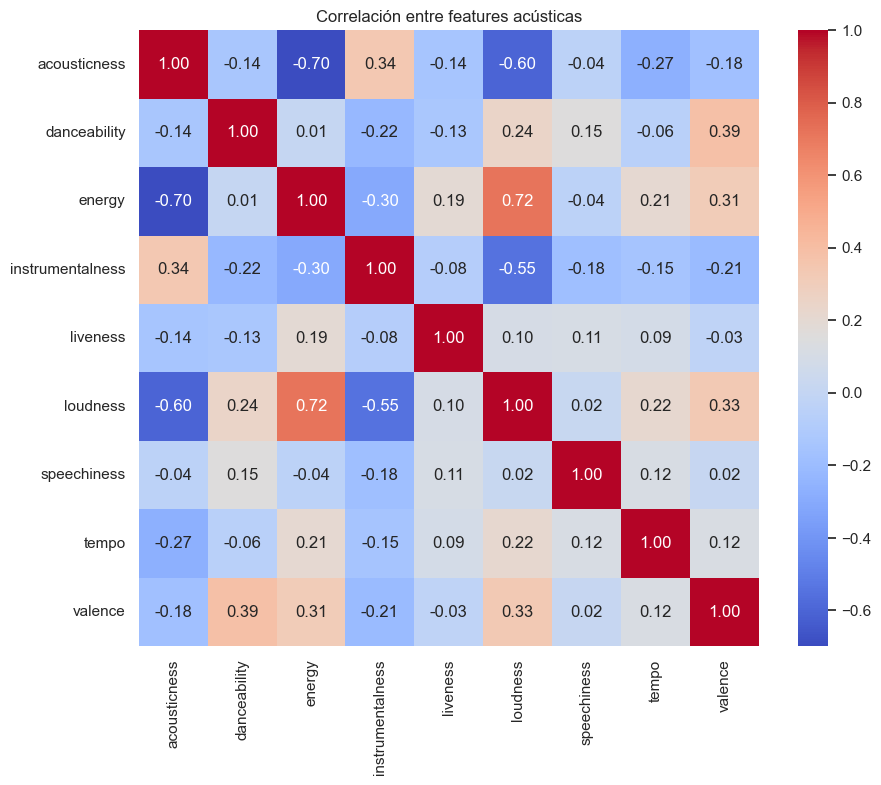

In [75]:
features_acusticas = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

# Para correlación entre features acústicas
df_features = df_final_filtrado[features_acusticas]

# Para correlación con popularidad
df_features_pop = df_final_filtrado[features_acusticas + ['popularidad']]



# Correlación entre features acústicas
corr_features = df_features.corr()
print(corr_features)

# Correlación de features acústicas con popularidad
corr_features_pop = df_features_pop.corr()['popularidad'].sort_values(ascending=False)
print(corr_features_pop)



plt.figure(figsize=(10,8))
sns.heatmap(corr_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre features acústicas")
plt.savefig('../reports/figures/04-Correlación entre features acústicas.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualizar correlación con popularidad

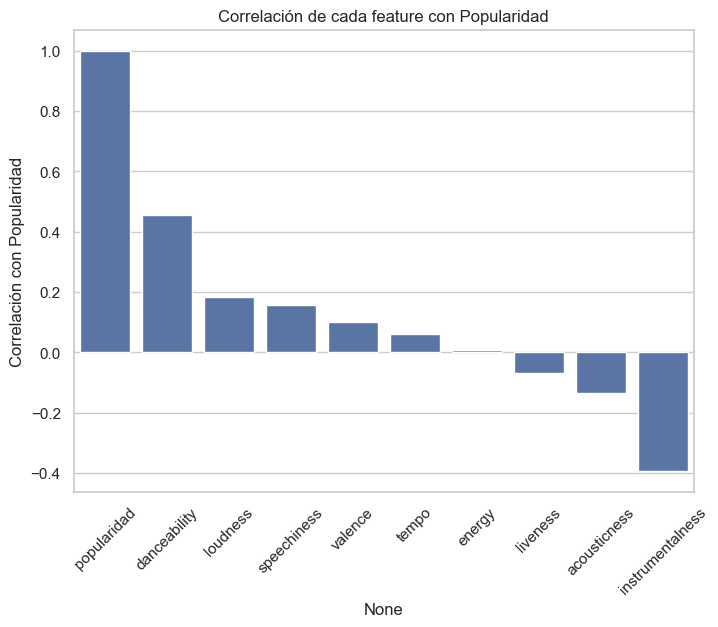

In [68]:
plt.figure(figsize=(8,6))
sns.barplot(x=corr_features_pop.index, y=corr_features_pop.values)
plt.xticks(rotation=45)
plt.title("Correlación de cada feature con Popularidad")
plt.ylabel("Correlación con Popularidad")
plt.savefig('../reports/figures/04-Correlación con popularidad.png', dpi=300, bbox_inches='tight')
plt.show()



### Scatter plots individuales entre dos features 

#### danceability vs energy coloreado por género:

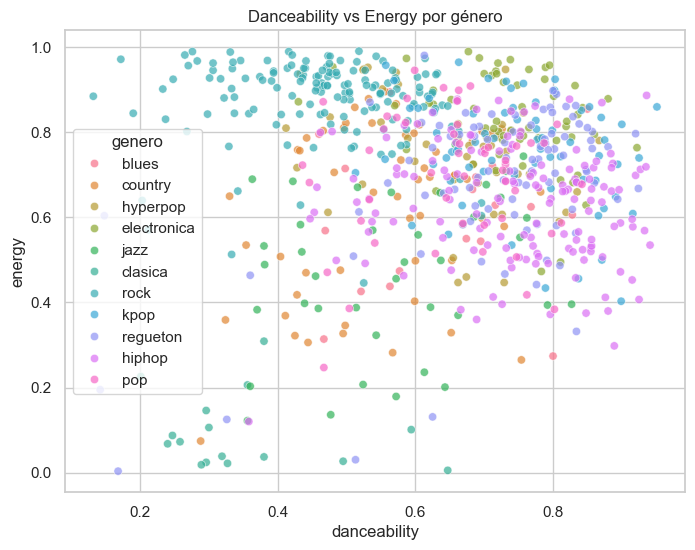

In [69]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final_filtrado,
    x='danceability',
    y='energy',
    hue='genero',      # colorea según el género
    alpha=0.7           # transparencia para ver densidad
)
plt.title('Danceability vs Energy por género')
plt.savefig('../reports/figures/04-scatterplot-danceability-vs-energy.png', dpi=300, bbox_inches='tight')
plt.show()

#### tempo vs danceability coloreado por género:

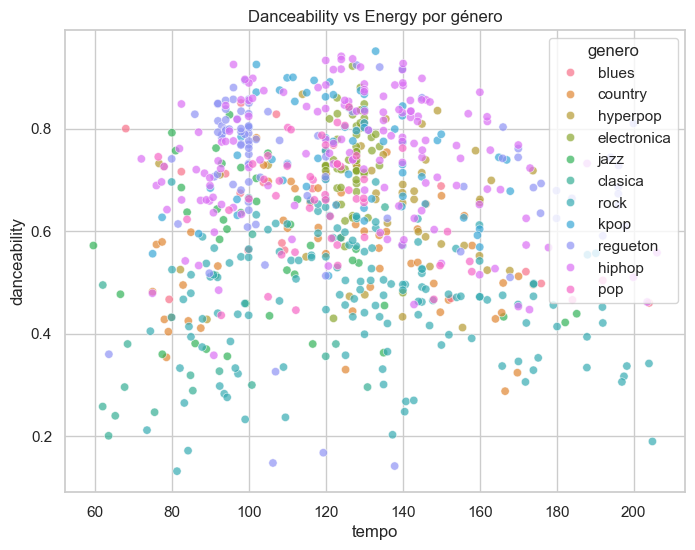

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final_filtrado,
    x='tempo',
    y='danceability',
    hue='genero',      # colorea según el género
    alpha=0.7           # transparencia para ver densidad
)
plt.title('Danceability vs Energy por género')
plt.savefig('../reports/figures/04-scatterplot-tempo-vs-danceability.png', dpi=300, bbox_inches='tight')
plt.show()

In [71]:
df_final_filtrado[df_final_filtrado['genero'].isin(['Pop','Rock','Hip-hop'])]

,artista,tema,genero,popularidad,fuente,spotify_id,año,id,href,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence


### Scatterplot danceability vs popularidad, agrupados por genero

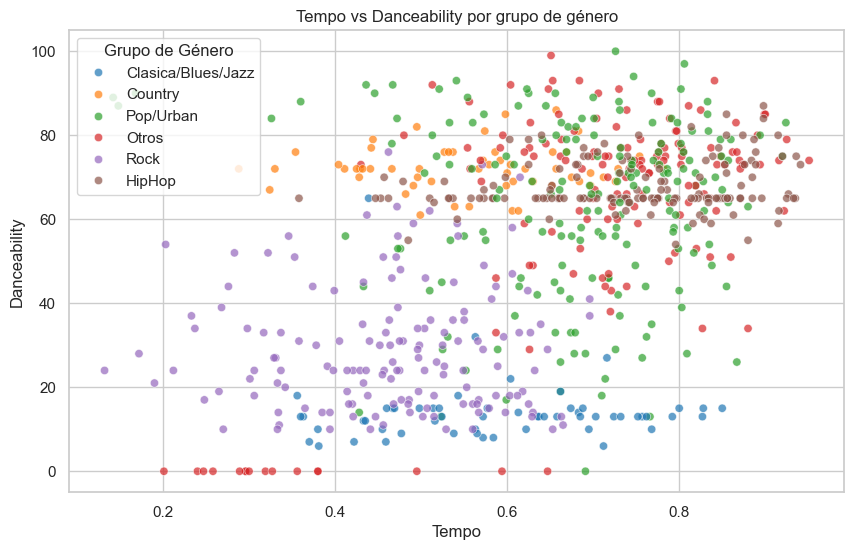

In [72]:
# Hacemos una copia temporal
df_temp = df_final_filtrado.copy()

# Definir función para asignar grupos
def asignar_grupo(genero):
    genero_lower = genero.lower()
    if genero_lower in ['hip-hop', 'hiphop']:
        return 'HipHop'
    elif genero_lower in ['rock']:
        return 'Rock'
    elif genero_lower in ['country']:
        return 'Country'
    elif genero_lower in ['hyperpop', 'k-pop', 'pop', 'reguetón', 'regueton']:
        return 'Pop/Urban'
    elif genero_lower in ['dance & electronic', 'electronic']:
        return 'Electronica'
    elif genero_lower in ['classical', 'blues', 'jazz']:
        return 'Clasica/Blues/Jazz'
    else:
        return 'Otros'

# Crear la columna de grupo solo en la copia
df_temp['grupo_genero'] = df_temp['genero'].apply(asignar_grupo)


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_temp,
    x='danceability',
    y='popularidad',
    hue='grupo_genero',
    palette='tab10',
    alpha=0.7
)
plt.title('Tempo vs Danceability por grupo de género')
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.legend(title='Grupo de Género')
plt.savefig('../reports/figures/04-scatterplot-danceability-vs-popu-genero.png', dpi=300, bbox_inches='tight')
plt.show()


### Pairplot para ver todas las relaciones

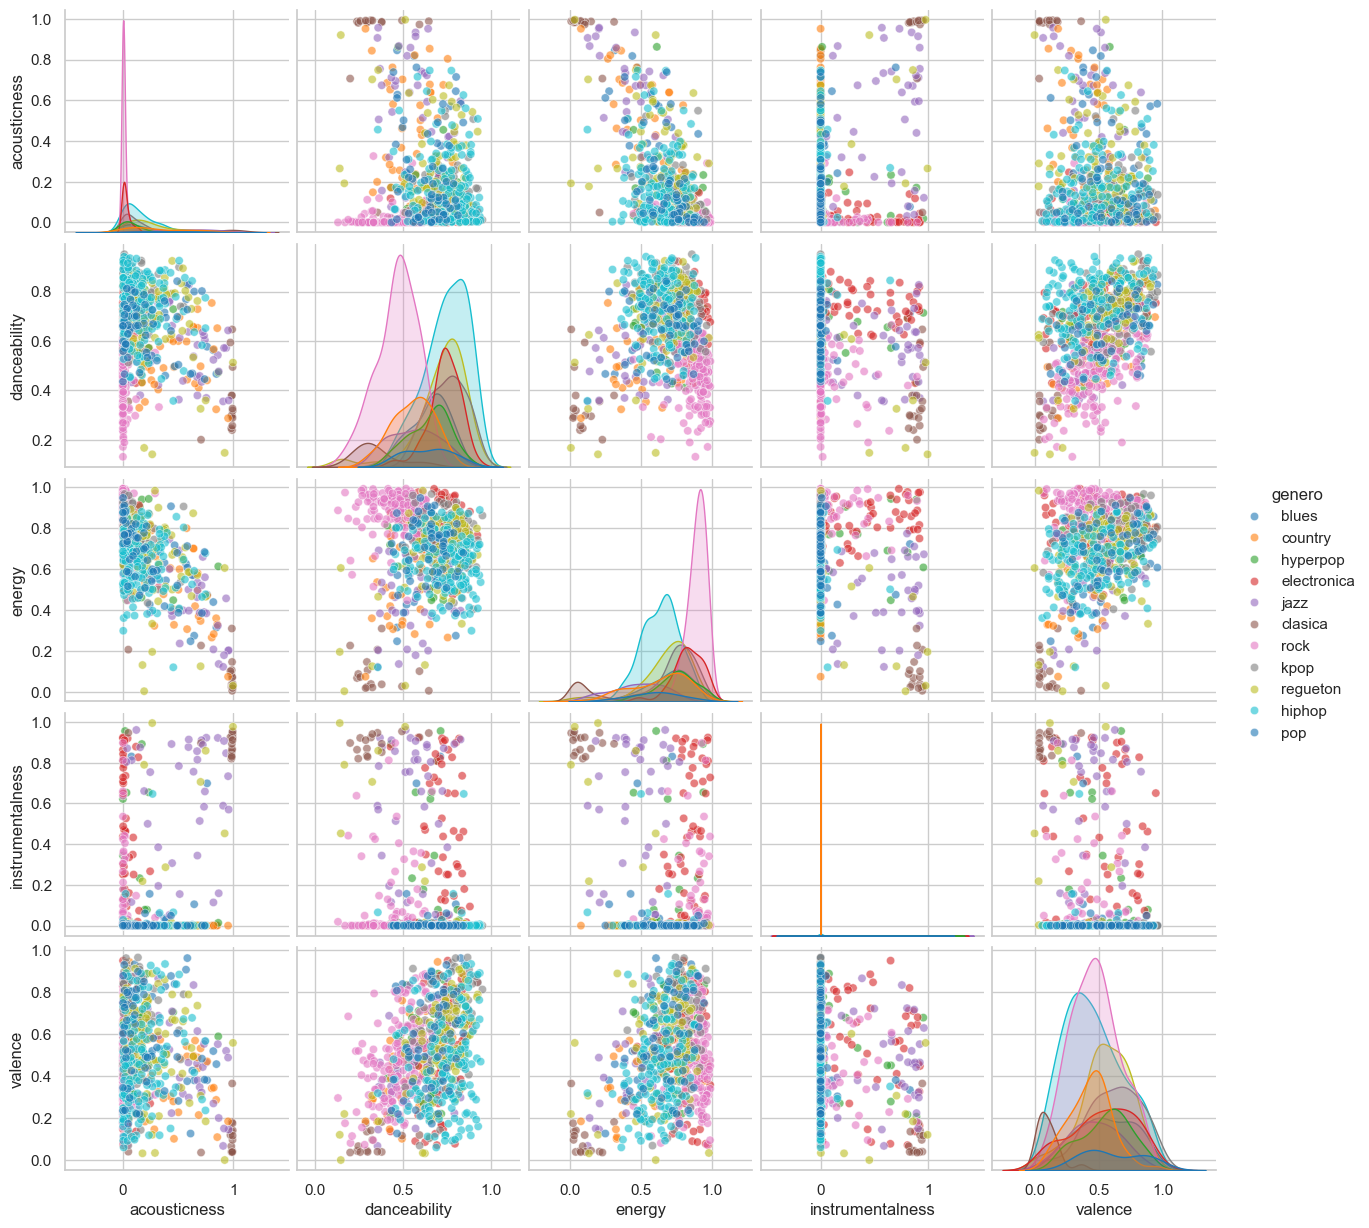

In [73]:
# Seleccionamos solo algunas features para que no sea demasiado cargado
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']

sns.pairplot(
    df_final_filtrado[features + ['genero']], 
    hue='genero',        # colorea por género
    diag_kind='kde',     # distribución en diagonal
    palette='tab10',     # paleta de colores
    plot_kws={'alpha':0.6}  # transparencia
)
plt.savefig('../reports/figures/04-pairplot.png', dpi=300, bbox_inches='tight')
plt.show()


### Boxplot por género vs popularidad

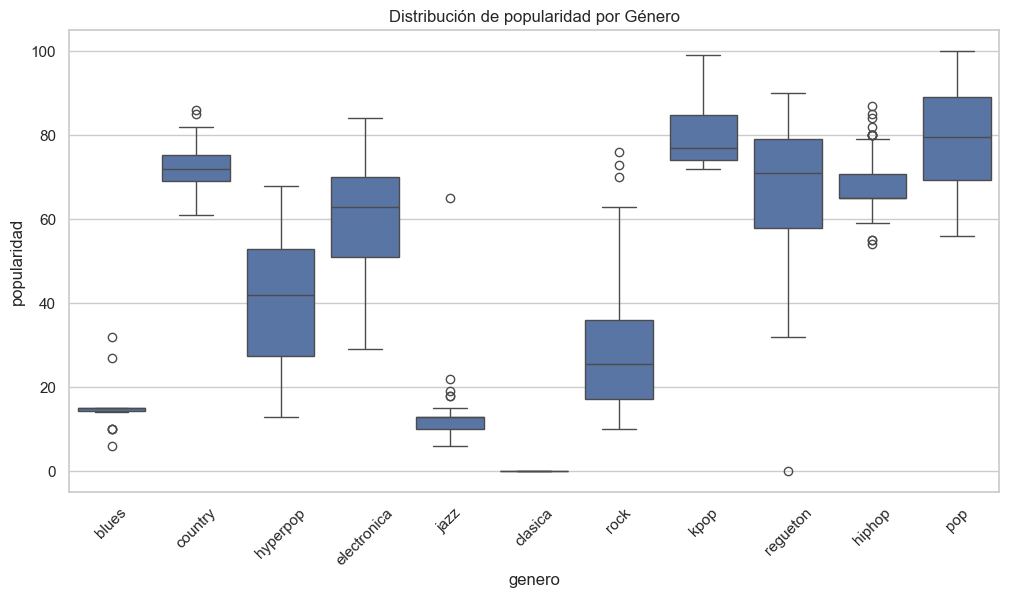

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_final_filtrado,
    x='genero',
    y='popularidad',
)
plt.xticks(rotation=45)  # gira etiquetas si hay muchos géneros
plt.title('Distribución de popularidad por Género')
plt.savefig('../reports/figures/04-distribucion-popularidad-vs-genero.png', dpi=300, bbox_inches='tight')
plt.show()
